In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load clean dataset
df = pd.read_csv('../data/cleaned_retail_data.csv', parse_dates=['Date', 'Time'])

In [2]:
df.info()
df.describe()
df.head()

<class 'pandas.DataFrame'>
RangeIndex: 182064 entries, 0 to 182063
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Transaction_ID       182064 non-null  float64       
 1   Customer_ID          182064 non-null  float64       
 2   City                 182064 non-null  str           
 3   State                182064 non-null  str           
 4   Country              182064 non-null  str           
 5   Age                  182064 non-null  float64       
 6   Gender               182064 non-null  str           
 7   Income               182064 non-null  str           
 8   Customer_Segment     182064 non-null  str           
 9   Date                 182064 non-null  datetime64[us]
 10  Year                 182064 non-null  int64         
 11  Month                182064 non-null  int64         
 12  Time                 182064 non-null  str           
 13  Total_Purchases      1820

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,...,Payment_Method,Order_Status,Ratings,products,Order_YearMonth,Order_Hour,Revenue,Recency_Days,First_Purchase_Date,Customer_Tenure
0,8691788.0,37249.0,Dortmund,Berlin,Germany,21.0,Male,Low,Regular,2023-09-18,...,Debit Card,Shipped,5.0,Cycling shorts,2023-09,22,324.086270,164,2023-06-14,96
1,2174773.0,69749.0,Nottingham,England,UK,19.0,Female,Low,Premium,2023-12-31,...,Credit Card,Processing,4.0,Lenovo Tab,2023-12,8,806.707815,60,2023-12-31,0
2,6679610.0,30192.0,Geelong,New South Wales,Australia,48.0,Male,Low,Regular,2023-04-26,...,Credit Card,Processing,2.0,Sports equipment,2023-04,4,1063.432799,309,2023-04-26,0
3,6095326.0,41289.0,Brisbane,New South Wales,Australia,58.0,Female,Medium,Premium,2023-09-21,...,PayPal,Pending,4.0,Lenovo Tab,2023-09,23,1185.167224,161,2023-08-31,21
4,5434096.0,97285.0,Kitchener,Ontario,Canada,29.0,Female,Low,New,2023-06-26,...,Cash,Processing,1.0,QLED TV,2023-06,13,630.115295,248,2023-06-26,0


In [3]:
print("Unique Customers:", df['Customer_ID'].nunique())
print("Unique Products:", df['products'].nunique())
print("Product Categories:", df['Product_Category'].nunique())

Unique Customers: 77772
Unique Products: 318
Product Categories: 6


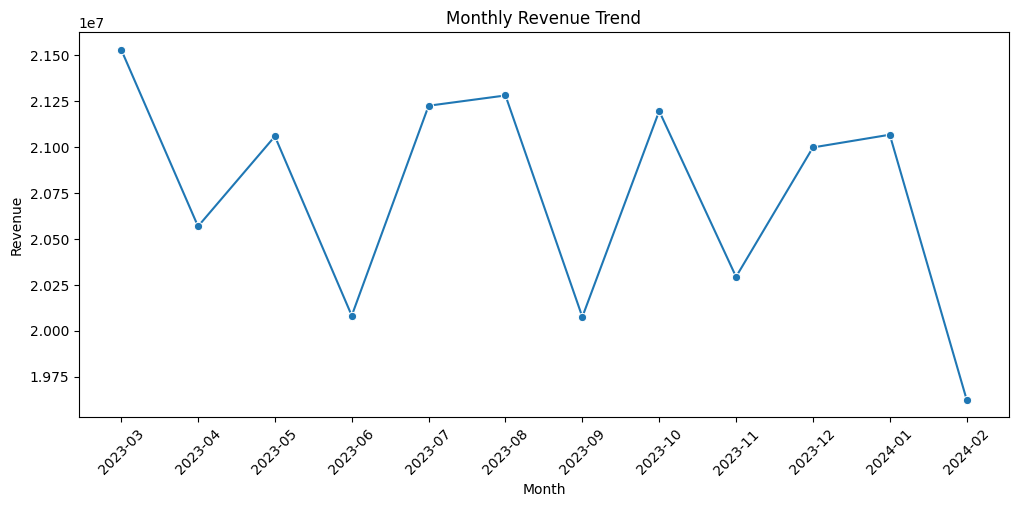

In [4]:
monthly_revenue = df.groupby('Order_YearMonth')['Revenue'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_revenue, x='Order_YearMonth', y='Revenue', marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

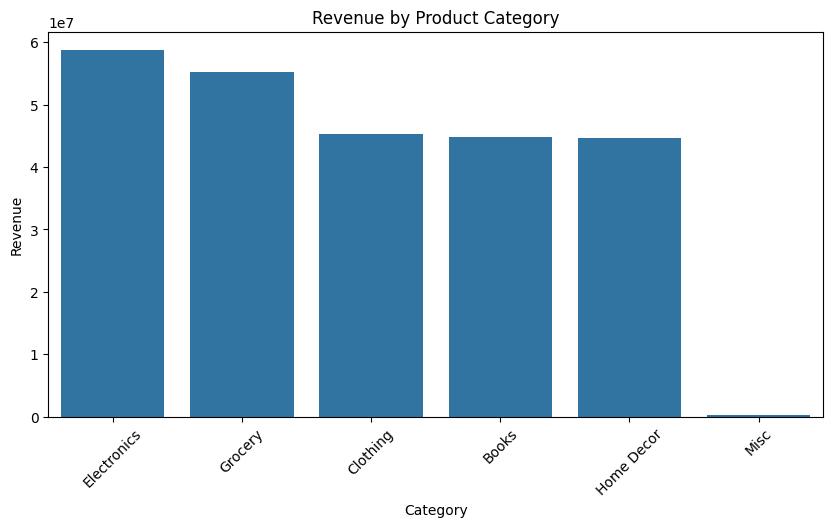

In [5]:
category_revenue = df.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

In [6]:
rfm = df.groupby('Customer_ID').agg({
    'Recency_Days': 'min',
    'Transaction_ID': 'count',
    'Revenue': 'sum'
}).rename(columns={'Transaction_ID':'Frequency', 'Revenue':'Monetary'}).reset_index()

rfm.head()

,Customer_ID,Recency_Days,Frequency,Monetary
0,10000.0,102,4,5007.566359
1,10001.0,104,4,4256.918340
2,10002.0,94,4,3747.140929
3,10003.0,227,1,1890.735873
4,10004.0,30,1,1541.117698


In [7]:
top_customers = rfm.sort_values(by='Monetary', ascending=False).head(10)
print(top_customers)

       Customer_ID  Recency_Days  Frequency      Monetary
27380      41641.0             7          8  21931.911726
47309      64700.0             6          9  21018.903366
76002      97957.0            29          9  20803.449760
71310      92491.0            69          8  20002.110903
35743      51318.0             4          6  19631.648351
39875      56105.0            35          9  18854.800928
56697      75534.0            39          5  18789.390823
28550      42972.0            39          8  18726.313731
47230      64612.0            73          8  18309.271856
60929      80472.0             8          6  18261.453479


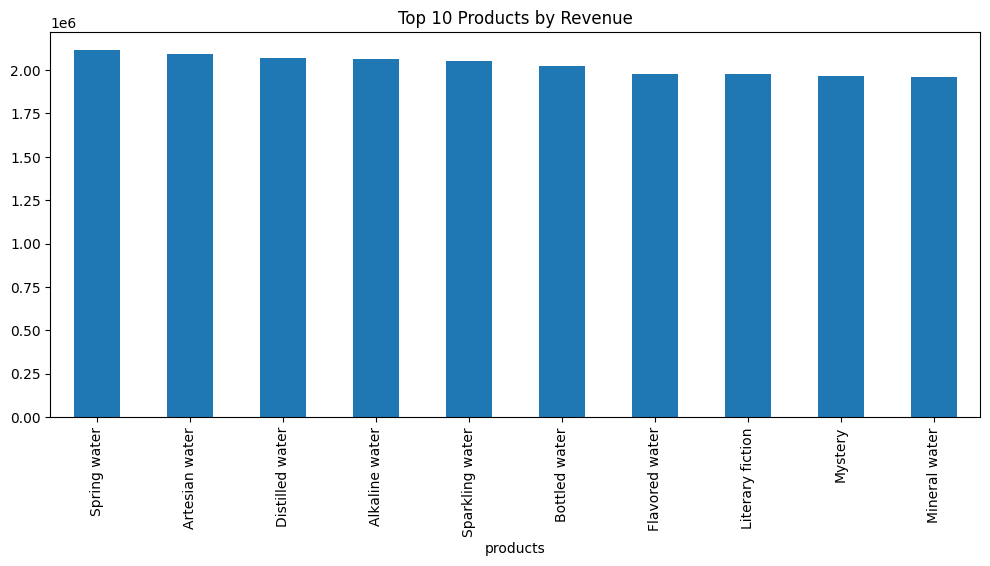

In [8]:
top_products = df.groupby('products')['Revenue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(12,5), title='Top 10 Products by Revenue')
plt.show()

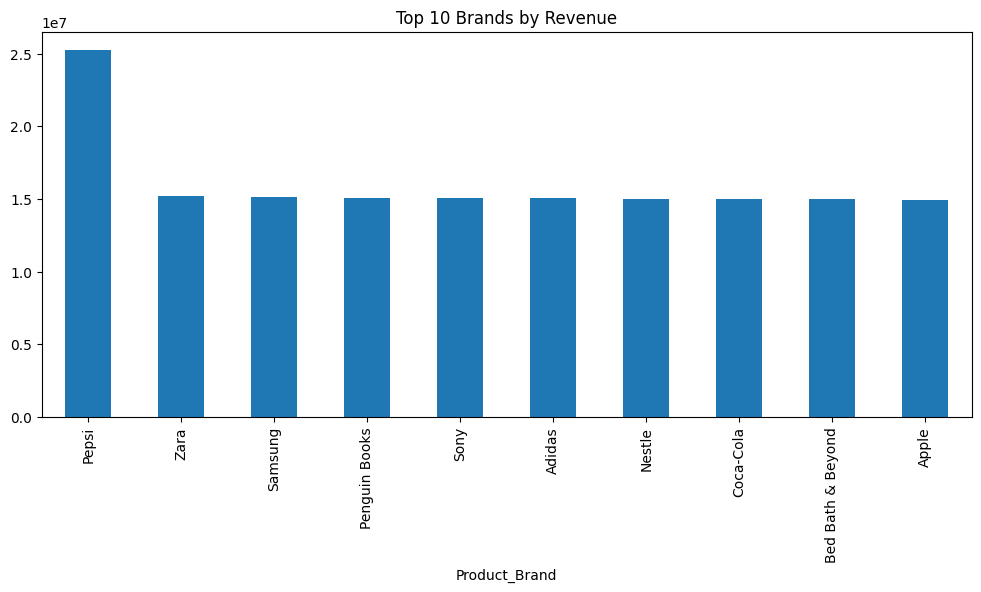

In [9]:
top_brands = df.groupby('Product_Brand')['Revenue'].sum().sort_values(ascending=False).head(10)
top_brands.plot(kind='bar', figsize=(12,5), title='Top 10 Brands by Revenue')
plt.show()

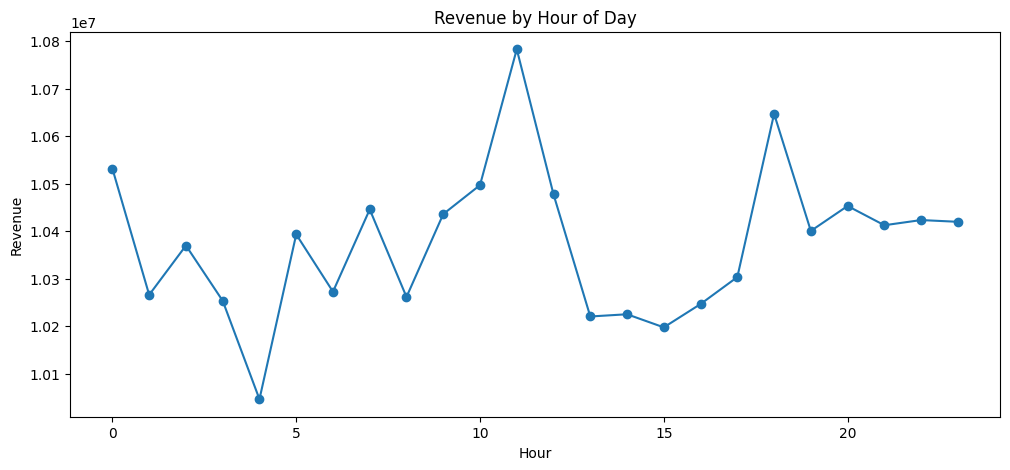

In [10]:
hourly_revenue = df.groupby('Order_Hour')['Revenue'].sum()
hourly_revenue.plot(kind='line', figsize=(12,5), marker='o', title='Revenue by Hour of Day')
plt.xlabel("Hour")
plt.ylabel("Revenue")
plt.show()

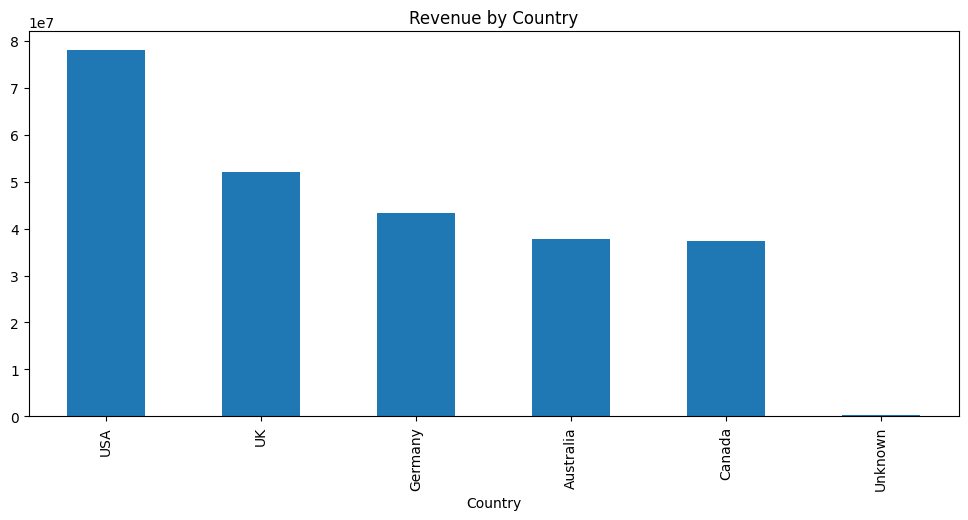

In [11]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
country_revenue.plot(kind='bar', figsize=(12,5), title='Revenue by Country')
plt.show()

In [12]:
rfm.to_csv('../data/rfm_summary.csv', index=False)
monthly_revenue.to_csv('../data/monthly_revenue.csv', index=False)

In [13]:
# RFM — Recency, Frequency, Monetary
rfm = df.groupby('Customer_ID').agg({
    'Recency_Days': 'min',
    'Transaction_ID': 'count',
    'Revenue': 'sum'
}).rename(columns={
    'Transaction_ID':'Frequency', 
    'Revenue':'Monetary'
}).reset_index()

# Save to CSV
rfm.to_csv('../data/rfm_summary.csv', index=False)

In [14]:
monthly_revenue = df.groupby('Order_YearMonth')['Revenue'].sum().reset_index()
monthly_revenue.to_csv('../data/monthly_revenue.csv', index=False)

In [15]:
category_revenue = df.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False).reset_index()
category_revenue.to_csv('../data/category_revenue.csv', index=False)

In [16]:
# Top Products
top_products = df.groupby('products')['Revenue'].sum().sort_values(ascending=False).reset_index()
top_products.to_csv('../data/top_products.csv', index=False)

# Top Brands
top_brands = df.groupby('Product_Brand')['Revenue'].sum().sort_values(ascending=False).reset_index()
top_brands.to_csv('../data/top_brands.csv', index=False)

In [17]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).reset_index()
country_revenue.to_csv('../data/country_revenue.csv', index=False)

In [18]:
hourly_revenue = df.groupby('Order_Hour')['Revenue'].sum().reset_index()
hourly_revenue.to_csv('../data/hourly_revenue.csv', index=False)